# 세팅하기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import numpy as np

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import datetime
import scipy.stats

%matplotlib inline
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 그래프 시각화 한글 처리
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

## 코드 실행 후 런타임 다시 시작 --> 해당 셀 제외하고 코드 실행

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (40.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120829 files and direc

In [ ]:
afta = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/train_A998.csv')
afta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176807 entries, 0 to 1176806
Data columns (total 34 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   delta     1176807 non-null  int64  
 1   y         1176807 non-null  int64  
 2   예매금액      1176807 non-null  float64
 3   교통개수      1176807 non-null  float64
 4   팔로워합      1176807 non-null  float64
 5   좌석등급개수    1176807 non-null  float64
 6   공연별전사코개수  1176807 non-null  float64
 7   강수        1176807 non-null  float64
 8   불쾌지수      1176807 non-null  float64
 9   소요시간      1176807 non-null  float64
 10  좌석수       1176807 non-null  float64
 11  매출액       1176807 non-null  float64
 12  공연횟수      1176807 non-null  float64
 13  좌석점유율     1176807 non-null  float64
 14  할인종류개수    1176807 non-null  float64
 15  할인율       1176807 non-null  float64
 16  일일확진자     1176807 non-null  float64
 17  예매가능공연개수  1176807 non-null  float64
 18  공.예       1176807 non-null  float64
 19  시설합       1176807 non

# 2022YM_surv2

In [ ]:
# Define a custom function to convert 'N'/'Y' values to boolean
def map_to_boolean(value):
    return value == 'Y'

def extract_address(address):
    return address.split('(')[0].strip()

# Define a dictionary with column names as keys and custom converter functions as values
converters = {
    '편의시설_레스토랑 여부': map_to_boolean,
    '편의시설_카페 여부': map_to_boolean,
    '편의시설_편의점 여부': map_to_boolean,
    '편의시설_놀이방 여부': map_to_boolean,
    '편의시설_수유실 여부': map_to_boolean,
    '장애인시설_주차장 여부': map_to_boolean,
    '장애인시설_화장실 여부': map_to_boolean,
    '장애인시설_경사로 여부': map_to_boolean,
    '장애인시설_전용엘리베이터 여부': map_to_boolean,
    '주차시설_자체 여부': map_to_boolean,
    '주차시설_공영 여부': map_to_boolean,
    '무대시설_오케스트라피트 여부': map_to_boolean,
    '무대시설_연습실 여부': map_to_boolean,
    '무대시설_분장실 여부': map_to_boolean,
    '아동공연 여부': map_to_boolean,
    '축제 여부': map_to_boolean,
    '내한공연 여부': map_to_boolean,
    '오픈런 여부': map_to_boolean,
    '단독판매여부': map_to_boolean,

    '주소': extract_address,

}

included_columns =  [
    '전송사업자코드','공연시설코드','입장권고유번호','예매/취소일시','예매/취소구분','예매/취소금액','할인금액','성별','단독판매여부']


# List of months to concatenate
months_to_concat = range(1, 13)

# List to store DataFrames for each month
dfs_to_concat = []

FC = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/FC/allFC_230815.csv')
unique_codes_list = FC['공연시설코드'].unique().tolist()

# Loop through the specified months and read the CSV files
for month in months_to_concat:
    file_path = f'/content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022({month}).csv'
    print(f"Processing file: {file_path}")

    df = pd.read_csv(file_path, converters=converters, usecols=included_columns)
    dfs_to_concat.append(df)

# Concatenate DataFrames
combined_df = pd.concat(dfs_to_concat, ignore_index=True)

filtered_df = combined_df[combined_df['공연시설코드'].isin(unique_codes_list)]
filtered_df = filtered_df.drop_duplicates()

filtered_df.drop(columns='공연시설코드', inplace=True)

output_file_path = '/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv2.csv'
filtered_df.to_csv(output_file_path, index=False, encoding="utf-8")

Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(1).csv
Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(2).csv
Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(3).csv


<ipython-input-12-fb01e507cc38>:56: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, converters=converters, usecols=included_columns)


Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(4).csv


<ipython-input-12-fb01e507cc38>:56: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, converters=converters, usecols=included_columns)


Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(5).csv


<ipython-input-12-fb01e507cc38>:56: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, converters=converters, usecols=included_columns)


Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(6).csv


<ipython-input-12-fb01e507cc38>:56: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, converters=converters, usecols=included_columns)


Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(7).csv


<ipython-input-12-fb01e507cc38>:56: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, converters=converters, usecols=included_columns)


Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(8).csv


<ipython-input-12-fb01e507cc38>:56: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, converters=converters, usecols=included_columns)


Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(9).csv


<ipython-input-12-fb01e507cc38>:56: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, converters=converters, usecols=included_columns)


Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(10).csv
Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(11).csv


<ipython-input-12-fb01e507cc38>:56: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, converters=converters, usecols=included_columns)


Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(12).csv


<ipython-input-12-fb01e507cc38>:56: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, converters=converters, usecols=included_columns)


In [ ]:
surv2 = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv2.csv')
surv2

,전송사업자코드,입장권고유번호,예매/취소일시,예매/취소구분,예매/취소금액,할인금액,성별,단독판매여부
0,SE000303,218587040_0,2021-12-15 08:48,1,120000,0,1,False
1,SE000303,218587040_0,2021-12-16 08:49,2,120000,0,1,False
2,SE000303,222894822_0,2021-12-28 15:03,1,120000,0,2,False
3,SE000303,222894822_0,2021-12-29 23:04,2,120000,0,2,False
4,SE000201,T1815426550,2021-10-25 15:43,1,29900,0,2,False
...,...,...,...,...,...,...,...,...
26563554,SE000101,39539092431600024,2022-12-30 16:30,1,88000,0,1,False
26563555,SE000101,39539092431600024,2022-12-30 16:41,2,88000,0,1,False
26563556,SE000101,39539092822300035,2022-12-30 16:34,1,88000,0,1,False
26563557,SE000101,39539093471400046,2022-12-30 16:40,1,88000,0,1,False


# 날씨 붙이기

In [ ]:
fc_d = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_unique.csv',usecols = ['공연시설코드','입장권고유번호', '공연일시'])

In [ ]:
fc_d

,공연시설코드,입장권고유번호,공연일시
0,FC222028,W2229628466001,2022-04-18 17:15:00
1,FC222028,W2229628466002,2022-04-18 17:15:00
2,FC222028,W2229226914001,2022-04-19 15:00:00
3,FC222028,W2229226914002,2022-04-19 15:00:00
4,FC223396,W2250065445001,2022-04-19 17:00:00
...,...,...,...
10245761,FC224161,39539086152200047,2022-12-31 23:30:00
10245762,FC224161,39539092431600024,2022-12-31 23:30:00
10245763,FC224161,39539092822300035,2022-12-31 23:30:00
10245764,FC224161,39539093471400046,2022-12-31 23:30:00


In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/CO/allCO_230816_sale_update.csv',usecols=['공연시설코드','공연일시','강수','기온','습도','미세먼지등급'])

In [ ]:
weather.head()

,공연시설코드,공연일시,강수,기온,습도,미세먼지등급
0,FC222055,2022-04-26 20:00:00,0.0,13.2,31.0,1.0
1,FC222055,2022-04-27 20:00:00,0.0,11.7,54.0,2.0
2,FC222055,2022-04-28 20:00:00,2.5,10.8,95.0,1.0
3,FC222055,2022-04-29 20:00:00,0.0,11.0,70.0,0.0
4,FC222055,2022-04-30 15:00:00,0.0,10.1,65.0,0.0


In [ ]:
new_column_names = ['공연시설코드', '공연일시','강수','기온','습도','미세먼지']
weather.set_axis(new_column_names, axis=1, inplace=True)

<ipython-input-25-f5a159df8fa8>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  weather.set_axis(new_column_names, axis=1, inplace=True)


In [ ]:
trans = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/CO/coco_clust_196719.csv',usecols=['공연시설코드','교통개수'])
trans = trans.drop_duplicates()
trans

,공연시설코드,교통개수
0,FC222055,20
3207,FC223420,31
5052,FC223671,20
7251,FC223740,23
12619,FC223454,27
...,...,...
196712,FC225478,21
196713,FC225484,35
196715,FC225487,8
196716,FC225541,25


In [ ]:
fc_d_weat = pd.merge(weather, trans, on=['공연시설코드'])
fc_d_weat

,공연시설코드,공연일시,강수,기온,습도,미세먼지등급,교통개수
0,FC222055,2022-04-26 20:00:00,0.0,13.2,31.0,1.0,20
1,FC222055,2022-04-27 20:00:00,0.0,11.7,54.0,2.0,20
2,FC222055,2022-04-28 20:00:00,2.5,10.8,95.0,1.0,20
3,FC222055,2022-04-29 20:00:00,0.0,11.0,70.0,0.0,20
4,FC222055,2022-04-30 15:00:00,0.0,10.1,65.0,0.0,20
...,...,...,...,...,...,...,...
196762,FC225484,2022-12-31 18:00:00,0.0,2.3,67.0,1.0,35
196763,FC225487,2022-12-31 21:00:00,0.0,-3.3,82.0,1.0,8
196764,FC225541,2022-12-23 19:00:00,0.0,-13.1,57.0,0.0,25
196765,FC225413,2021-06-05 18:00:00,0.0,19.1,85.0,1.0,31


In [ ]:
fc_d_weat = fc_d_weat.drop_duplicates()
fc_d_weat

,공연시설코드,공연일시,강수,기온,습도,미세먼지등급,교통개수
0,FC222055,2022-04-26 20:00:00,0.0,13.2,31.0,1.0,20
1,FC222055,2022-04-27 20:00:00,0.0,11.7,54.0,2.0,20
2,FC222055,2022-04-28 20:00:00,2.5,10.8,95.0,1.0,20
3,FC222055,2022-04-29 20:00:00,0.0,11.0,70.0,0.0,20
4,FC222055,2022-04-30 15:00:00,0.0,10.1,65.0,0.0,20
...,...,...,...,...,...,...,...
196762,FC225484,2022-12-31 18:00:00,0.0,2.3,67.0,1.0,35
196763,FC225487,2022-12-31 21:00:00,0.0,-3.3,82.0,1.0,8
196764,FC225541,2022-12-23 19:00:00,0.0,-13.1,57.0,0.0,25
196765,FC225413,2021-06-05 18:00:00,0.0,19.1,85.0,1.0,31


In [ ]:
surv_o = pd.merge(fc_d, fc_d_weat, on=['공연시설코드','공연일시'],how='left')
surv_o

,공연시설코드,입장권고유번호,공연일시,강수,기온,습도,미세먼지등급,교통개수
0,FC222028,W2229628466001,2022-04-18 17:15:00,0.0,10.3,70.0,1.0,22
1,FC222028,W2229628466002,2022-04-18 17:15:00,0.0,10.3,70.0,1.0,22
2,FC222028,W2229226914001,2022-04-19 15:00:00,0.0,11.5,66.0,1.0,22
3,FC222028,W2229226914002,2022-04-19 15:00:00,0.0,11.5,66.0,1.0,22
4,FC223396,W2250065445001,2022-04-19 17:00:00,0.0,10.7,71.0,1.0,29
...,...,...,...,...,...,...,...,...
10245761,FC224161,39539086152200047,2022-12-31 23:30:00,0.0,-0.8,67.0,1.0,53
10245762,FC224161,39539092431600024,2022-12-31 23:30:00,0.0,-0.8,67.0,1.0,53
10245763,FC224161,39539092822300035,2022-12-31 23:30:00,0.0,-0.8,67.0,1.0,53
10245764,FC224161,39539093471400046,2022-12-31 23:30:00,0.0,-0.8,67.0,1.0,53


In [ ]:
surv_o.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_outsource.csv', index=False)

In [ ]:
su = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_unique_outsource_공연장.csv')
su.head()

,공연시설코드,공연장코드,공연코드,입장권고유번호,판매시작일시,판매종료일시,예매일,취소일,공연일시,취소가능기간,...,팔로워합,수상실적개수,매출액,좌석등급개수,무대시설,예매할인율,공연별전사코개수,강수,기온,습도
0,FC222028,FC222028-01,PF343804,W2229628466001,2022-04-18 00:00:00,2022-04-18 17:15:00,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00,1,...,NaN,0,3366500.0,1,2,0.0,4,0.0,10.3,70.0
1,FC222028,FC222028-01,PF343804,W2229628466002,2022-04-18 00:00:00,2022-04-18 17:15:00,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00,1,...,NaN,0,3366500.0,1,2,0.0,4,0.0,10.3,70.0
2,FC222028,FC222028-01,PF343804,W2229226914001,2022-04-18 00:00:00,2022-04-19 15:00:00,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00,2,...,NaN,0,3366500.0,1,2,0.0,4,0.0,11.5,66.0
3,FC222028,FC222028-01,PF343804,W2229226914002,2022-04-18 00:00:00,2022-04-19 15:00:00,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00,2,...,NaN,0,3366500.0,1,2,0.0,4,0.0,11.5,66.0
4,FC223396,FC223396-01,PF307406,W2250065445001,2022-04-18 00:00:00,2022-04-19 16:55:00,2022-04-19 15:18:00,NaN,2022-04-19 17:00:00,2,...,156.0,0,936750.0,1,1,0.0,3,0.0,10.7,71.0


### 미세먼지수정

In [ ]:
su = su.drop(['미세먼지등급'], axis = 1)

In [ ]:
micro = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/CO/allCO_230816_sale_update.csv',usecols=['공연시설코드','공연일시','미세먼지등급'])

In [ ]:
micro = micro.drop_duplicates()

In [ ]:
newm = pd.merge(su, micro, on = ['공연시설코드','공연일시'],how='left')
newm

,공연시설코드,공연장코드,공연코드,입장권고유번호,판매시작일시,판매종료일시,예매일,취소일,공연일시,취소가능기간,...,수상실적개수,매출액,좌석등급개수,무대시설,예매할인율,공연별전사코개수,강수,기온,습도,미세먼지등급
0,FC222028,FC222028-01,PF343804,W2229628466001,2022-04-18 00:00:00,2022-04-18 17:15:00,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00,1,...,0,3366500.0,1,2,0.0,4,0.0,10.3,70.0,1.0
1,FC222028,FC222028-01,PF343804,W2229628466002,2022-04-18 00:00:00,2022-04-18 17:15:00,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00,1,...,0,3366500.0,1,2,0.0,4,0.0,10.3,70.0,1.0
2,FC222028,FC222028-01,PF343804,W2229226914001,2022-04-18 00:00:00,2022-04-19 15:00:00,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00,2,...,0,3366500.0,1,2,0.0,4,0.0,11.5,66.0,1.0
3,FC222028,FC222028-01,PF343804,W2229226914002,2022-04-18 00:00:00,2022-04-19 15:00:00,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00,2,...,0,3366500.0,1,2,0.0,4,0.0,11.5,66.0,1.0
4,FC223396,FC223396-01,PF307406,W2250065445001,2022-04-18 00:00:00,2022-04-19 16:55:00,2022-04-19 15:18:00,NaN,2022-04-19 17:00:00,2,...,0,936750.0,1,1,0.0,3,0.0,10.7,71.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10245761,FC224161,FC224161-01,PF426714,39539086152200047,2022-12-20 19:00:00,2022-12-30 17:00:00,2022-12-30 15:32:00,NaN,2022-12-31 23:30:00,12,...,0,50600000.0,1,0,0.0,1,0.0,-0.8,67.0,1.0
10245762,FC224161,FC224161-01,PF426714,39539092431600024,2022-12-20 19:00:00,2022-12-30 17:00:00,2022-12-30 16:30:00,2022-12-30 16:41:00,2022-12-31 23:30:00,12,...,0,50600000.0,1,0,0.0,1,0.0,-0.8,67.0,1.0
10245763,FC224161,FC224161-01,PF426714,39539092822300035,2022-12-20 19:00:00,2022-12-30 17:00:00,2022-12-30 16:34:00,NaN,2022-12-31 23:30:00,12,...,0,50600000.0,1,0,0.0,1,0.0,-0.8,67.0,1.0
10245764,FC224161,FC224161-01,PF426714,39539093471400046,2022-12-20 19:00:00,2022-12-30 17:00:00,2022-12-30 16:40:00,NaN,2022-12-31 23:30:00,12,...,0,50600000.0,1,0,0.0,1,0.0,-0.8,67.0,1.0


In [ ]:
newm.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_outsource_공연장.csv', index=False)

In [ ]:
part = newm[['입장권고유번호','미세먼지등급']]
part.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/new_micro.csv', index=False)

In [ ]:
part[part.isnull().any(axis=1)]

,입장권고유번호,미세먼지등급


### 다시 이어서

In [ ]:
weather = weather.drop_duplicates()

In [ ]:
rain = pd.merge(su, weather[['공연시설코드','공연일시','강수','기온','습도']], on = ['공연시설코드','공연일시'],how='left')
rain

,공연시설코드,공연장코드,공연코드,입장권고유번호,판매시작일시,판매종료일시,예매일,취소일,공연일시,취소가능기간,...,팔로워합,수상실적개수,매출액,좌석등급개수,무대시설,예매할인율,공연별전사코개수,강수,기온,습도
0,FC222028,FC222028-01,PF343804,W2229628466001,2022-04-18 00:00:00,2022-04-18 17:15:00,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00,1,...,NaN,0,3366500.0,1,2,0.0,4,0.0,10.3,70.0
1,FC222028,FC222028-01,PF343804,W2229628466002,2022-04-18 00:00:00,2022-04-18 17:15:00,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00,1,...,NaN,0,3366500.0,1,2,0.0,4,0.0,10.3,70.0
2,FC222028,FC222028-01,PF343804,W2229226914001,2022-04-18 00:00:00,2022-04-19 15:00:00,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00,2,...,NaN,0,3366500.0,1,2,0.0,4,0.0,11.5,66.0
3,FC222028,FC222028-01,PF343804,W2229226914002,2022-04-18 00:00:00,2022-04-19 15:00:00,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00,2,...,NaN,0,3366500.0,1,2,0.0,4,0.0,11.5,66.0
4,FC223396,FC223396-01,PF307406,W2250065445001,2022-04-18 00:00:00,2022-04-19 16:55:00,2022-04-19 15:18:00,NaN,2022-04-19 17:00:00,2,...,156.0,0,936750.0,1,1,0.0,3,0.0,10.7,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10245761,FC224161,FC224161-01,PF426714,39539086152200047,2022-12-20 19:00:00,2022-12-30 17:00:00,2022-12-30 15:32:00,NaN,2022-12-31 23:30:00,12,...,0.0,0,50600000.0,1,0,0.0,1,0.0,-0.8,67.0
10245762,FC224161,FC224161-01,PF426714,39539092431600024,2022-12-20 19:00:00,2022-12-30 17:00:00,2022-12-30 16:30:00,2022-12-30 16:41:00,2022-12-31 23:30:00,12,...,0.0,0,50600000.0,1,0,0.0,1,0.0,-0.8,67.0
10245763,FC224161,FC224161-01,PF426714,39539092822300035,2022-12-20 19:00:00,2022-12-30 17:00:00,2022-12-30 16:34:00,NaN,2022-12-31 23:30:00,12,...,0.0,0,50600000.0,1,0,0.0,1,0.0,-0.8,67.0
10245764,FC224161,FC224161-01,PF426714,39539093471400046,2022-12-20 19:00:00,2022-12-30 17:00:00,2022-12-30 16:40:00,NaN,2022-12-31 23:30:00,12,...,0.0,0,50600000.0,1,0,0.0,1,0.0,-0.8,67.0


In [ ]:
rain.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_unique_outsource_공연장.csv', index=False)

In [ ]:
surv_f = pd.merge(su, surv_o, on = ['공연시설코드',	'공연일시'],how='left')
surv_f

TypeError: ignored

In [ ]:
surv_f.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_unique_outsource.csv', index=False)

# 날씨 수정해보기

In [ ]:
fc_d = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_unique.csv',usecols = ['공연시설코드','입장권고유번호', '공연일시'])

In [ ]:
fc_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10245766 entries, 0 to 10245765
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   공연시설코드   object
 1   입장권고유번호  object
 2   공연일시     object
dtypes: object(3)
memory usage: 234.5+ MB


In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/CO/allCO_230816_sale_update.csv',usecols=['공연시설코드','공연일시','미세먼지등급','초미세먼지등급'])
weather = weather.drop_duplicates()

In [ ]:
fc_d_weat = pd.merge(fc_d, weather, on=['공연시설코드','공연일시'],how='left')
fc_d_weat

,공연시설코드,입장권고유번호,공연일시,미세먼지등급,초미세먼지등급
0,FC222028,W2229628466001,2022-04-18 17:15:00,1.0,1.0
1,FC222028,W2229628466002,2022-04-18 17:15:00,1.0,1.0
2,FC222028,W2229226914001,2022-04-19 15:00:00,1.0,2.0
3,FC222028,W2229226914002,2022-04-19 15:00:00,1.0,2.0
4,FC223396,W2250065445001,2022-04-19 17:00:00,1.0,1.0
...,...,...,...,...,...
10245761,FC224161,39539086152200047,2022-12-31 23:30:00,1.0,2.0
10245762,FC224161,39539092431600024,2022-12-31 23:30:00,1.0,2.0
10245763,FC224161,39539092822300035,2022-12-31 23:30:00,1.0,2.0
10245764,FC224161,39539093471400046,2022-12-31 23:30:00,1.0,2.0


In [ ]:
fc_d_weat[(fc_d_weat['미세먼지등급'].isnull()) & (fc_d_weat['초미세먼지등급'].isnull())]

,공연시설코드,입장권고유번호,공연일시,미세먼지등급,초미세먼지등급
2444,FC222233,W2296470831001,2022-04-29 15:00:00,NaN,NaN
2445,FC222233,W2253199627001,2022-04-29 15:00:00,NaN,NaN
2446,FC222233,W2245959509001,2022-04-29 15:00:00,NaN,NaN
2447,FC222233,W2245959509002,2022-04-29 15:00:00,NaN,NaN
2448,FC222233,W2261565349001,2022-04-29 15:00:00,NaN,NaN
...,...,...,...,...,...
9806208,FC222284,1438087510_3,2022-12-27 14:00:00,NaN,NaN
9806209,FC222284,1438376480_1,2022-12-27 14:00:00,NaN,NaN
9806210,FC222284,1438376480_2,2022-12-27 14:00:00,NaN,NaN
9806211,FC222284,1438406092_1,2022-12-27 14:00:00,NaN,NaN


In [ ]:
su = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_unique_outsource_공연장.csv')
su.head()

,공연시설코드,공연장코드,공연코드,입장권고유번호,판매시작일시,판매종료일시,예매일,취소일,공연일시,취소가능기간,...,취소금액,미세먼지등급,교통개수,팔로워합,수상실적개수,매출액,좌석등급개수,무대시설,예매할인율,공연별전사코개수
0,FC222028,FC222028-01,PF343804,W2229628466001,2022-04-18 00:00:00,2022-04-18 17:15:00,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00,1,...,0,1.0,22,NaN,0,3366500.0,1,2,0.0,4
1,FC222028,FC222028-01,PF343804,W2229628466002,2022-04-18 00:00:00,2022-04-18 17:15:00,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00,1,...,0,1.0,22,NaN,0,3366500.0,1,2,0.0,4
2,FC222028,FC222028-01,PF343804,W2229226914001,2022-04-18 00:00:00,2022-04-19 15:00:00,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00,2,...,0,1.0,22,NaN,0,3366500.0,1,2,0.0,4
3,FC222028,FC222028-01,PF343804,W2229226914002,2022-04-18 00:00:00,2022-04-19 15:00:00,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00,2,...,0,1.0,22,NaN,0,3366500.0,1,2,0.0,4
4,FC223396,FC223396-01,PF307406,W2250065445001,2022-04-18 00:00:00,2022-04-19 16:55:00,2022-04-19 15:18:00,NaN,2022-04-19 17:00:00,2,...,0,1.0,29,156.0,0,936750.0,1,1,0.0,3


In [ ]:
surv_f = pd.merge(su, surv_o, on = ['공연시설코드',	'공연일시'],how='left')
surv_f

TypeError: ignored

In [ ]:
surv_f.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_unique_outsource.csv', index=False)

# 예매일에 전송사업자가 장르별로 얼마나 다양한 공연을 제공하는가

In [ ]:
send = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_unique_outsource_공연장.csv')

In [ ]:
gen = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/CO/all_CO_2021_update.csv',usecols=['공연코드','장르명'])
gen.head()

,공연코드,장르명
0,PF364229,연극
1,PF388064,뮤지컬
2,PF388814,뮤지컬
3,PF380778,연극
4,PF389090,뮤지컬


In [ ]:
send_gen = pd.merge(send,gen,on=['공연코드'],how="left")
send_gen.head()

,공연시설코드,공연장코드,공연코드,입장권고유번호,판매시작일시,판매종료일시,예매일,취소일,공연일시,취소가능기간,...,수상실적개수,매출액,좌석등급개수,무대시설,예매할인율,공연별전사코개수,강수,기온,습도,장르명
0,FC222028,FC222028-01,PF343804,W2229628466001,2022-04-18 00:00:00,2022-04-18 17:15:00,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00,1,...,0,3366500.0,1,2,0.0,4,0.0,10.3,70.0,연극
1,FC222028,FC222028-01,PF343804,W2229628466002,2022-04-18 00:00:00,2022-04-18 17:15:00,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00,1,...,0,3366500.0,1,2,0.0,4,0.0,10.3,70.0,연극
2,FC222028,FC222028-01,PF343804,W2229226914001,2022-04-18 00:00:00,2022-04-19 15:00:00,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00,2,...,0,3366500.0,1,2,0.0,4,0.0,11.5,66.0,연극
3,FC222028,FC222028-01,PF343804,W2229226914002,2022-04-18 00:00:00,2022-04-19 15:00:00,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00,2,...,0,3366500.0,1,2,0.0,4,0.0,11.5,66.0,연극
4,FC223396,FC223396-01,PF307406,W2250065445001,2022-04-18 00:00:00,2022-04-19 16:55:00,2022-04-19 15:18:00,NaN,2022-04-19 17:00:00,2,...,0,936750.0,1,1,0.0,3,0.0,10.7,71.0,연극


In [ ]:
send_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10245766 entries, 0 to 10245765
Data columns (total 7 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   전송사업자코드  object
 1   장르명      object
 2   공연코드     object
 3   판매시작일시   object
 4   판매종료일시   object
 5   입장권고유번호  object
 6   예매일      object
dtypes: object(7)
memory usage: 625.4+ MB


In [ ]:
send_gen = send_gen[['전송사업자코드','장르명','공연코드','판매시작일시','판매종료일시','입장권고유번호','예매일']]

In [ ]:
send_gen.to_csv('/content/drive/MyDrive/KOPIS DATA/Colab/주나/send_gen.csv', index=False)

In [ ]:
send_gen = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Colab/주나/send_gen.csv')

In [ ]:
send3=send_gen[['전송사업자코드','장르명','입장권고유번호','예매일']]
send3 = send3.drop_duplicates()
send3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10245766 entries, 0 to 10245765
Data columns (total 4 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   전송사업자코드  object
 1   장르명      object
 2   입장권고유번호  object
 3   예매일      object
dtypes: object(4)
memory usage: 390.8+ MB


In [ ]:
perf=send_gen[['전송사업자코드','장르명','공연코드','판매시작일시','판매종료일시']]
perf = perf.drop_duplicates()
perf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59419 entries, 0 to 10244971
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   전송사업자코드  59419 non-null  object
 1   장르명      59419 non-null  object
 2   공연코드     59419 non-null  object
 3   판매시작일시   59419 non-null  object
 4   판매종료일시   59419 non-null  object
dtypes: object(5)
memory usage: 2.7+ MB


In [ ]:
for i in send3.index:
  if i % 500000==0:
    print(i)
  matching_perfs = perf[(perf['전송사업자코드'] == send3._get_value(i, '전송사업자코드')) &
    (perf['판매시작일시'] <= send3._get_value(i, '예매일')) &
    (perf['판매종료일시'] >= send3._get_value(i, '예매일'))]
  send3._set_value(i, '예매가능공연개수', matching_perfs['공연코드'].nunique() - 1)

### 방법3

In [ ]:
# apply 함수를 사용하여 예매 가능한 공연 코드 개수 계산
def calculate_available_count(row):
    matching_perfs = perf[
        (perf['전송사업자코드'] == row['전송사업자코드']) &
        (perf['장르명'] == row['장르명']) &
        (perf['판매시작일시'] <= row['예매일']) &
        (perf['판매종료일시'] >= row['예매일'])
    ]
    unique_available_count = len(matching_perfs['공연코드'].unique())
    return unique_available_count

send3['예매가능공연코드'] = send3.apply(calculate_available_count, axis=1)

send3.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_unique_outsource2.csv', index=False)

# 2022 YM 다시 만들기

In [ ]:
import pandas as pd
import os


# Define a custom function to convert 'N'/'Y' values to boolean
def map_to_boolean(value):
    return value == 'Y'

def extract_address(address):
    return address.split('(')[0].strip()

# Define a dictionary with column names as keys and custom converter functions as values
converters = {
    '편의시설_레스토랑 여부': map_to_boolean,
    '편의시설_카페 여부': map_to_boolean,
    '편의시설_편의점 여부': map_to_boolean,
    '편의시설_놀이방 여부': map_to_boolean,
    '편의시설_수유실 여부': map_to_boolean,
    '장애인시설_주차장 여부': map_to_boolean,
    '장애인시설_화장실 여부': map_to_boolean,
    '장애인시설_경사로 여부': map_to_boolean,
    '장애인시설_전용엘리베이터 여부': map_to_boolean,
    '주차시설_자체 여부': map_to_boolean,
    '주차시설_공영 여부': map_to_boolean,
    '무대시설_오케스트라피트 여부': map_to_boolean,
    '무대시설_연습실 여부': map_to_boolean,
    '무대시설_분장실 여부': map_to_boolean,
    '아동공연 여부': map_to_boolean,
    '축제 여부': map_to_boolean,
    '내한공연 여부': map_to_boolean,
    '오픈런 여부': map_to_boolean,
    '단독판매여부': map_to_boolean,

    '주소': extract_address,

}

included_columns =  [
    '공연시설코드', '공연장코드',
    '공연코드', '공연일시',
    '입장권고유번호', '예매/취소일시', '예매/취소구분',
    '판매시작일시', '판매종료일시']


# List of months to concatenate
months_to_concat = range(1, 13)

# List to store DataFrames for each month
dfs_to_concat = []

# Loop through the specified months and read the CSV files
for month in months_to_concat:
    file_path = f'/content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022({month}).csv'
    print(f"Processing file: {file_path}")

    df = pd.read_csv(file_path, converters=converters, usecols=included_columns)
    dfs_to_concat.append(df)

# Concatenate DataFrames
combined_df = pd.concat(dfs_to_concat, ignore_index=True)

Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(1).csv
Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(2).csv
Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(3).csv


<ipython-input-25-d048cf8e1020>:57: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, converters=converters, usecols=included_columns)


Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(4).csv


<ipython-input-25-d048cf8e1020>:57: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, converters=converters, usecols=included_columns)


Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(5).csv


<ipython-input-25-d048cf8e1020>:57: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, converters=converters, usecols=included_columns)


Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(6).csv


<ipython-input-25-d048cf8e1020>:57: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, converters=converters, usecols=included_columns)


Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(7).csv


<ipython-input-25-d048cf8e1020>:57: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, converters=converters, usecols=included_columns)


Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(8).csv


<ipython-input-25-d048cf8e1020>:57: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, converters=converters, usecols=included_columns)


Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(9).csv


<ipython-input-25-d048cf8e1020>:57: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, converters=converters, usecols=included_columns)


Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(10).csv
Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(11).csv


<ipython-input-25-d048cf8e1020>:57: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, converters=converters, usecols=included_columns)


Processing file: /content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022(12).csv


<ipython-input-25-d048cf8e1020>:57: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, converters=converters, usecols=included_columns)


In [ ]:
FC = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/FC/allFC_230815.csv')
unique_codes_list = FC['공연시설코드'].unique().tolist()

filtered_df = combined_df[combined_df['공연시설코드'].isin(unique_codes_list)]
filtered_df = filtered_df.drop_duplicates()

output_file_path = '/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM.csv'
filtered_df.to_csv(output_file_path, index=False, encoding="utf-8")

In [ ]:
combined_df = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM.csv')

## 오픈런인 행 삭제함

In [ ]:
import numpy as np

combined_df['판매종료일시'] = pd.to_datetime(combined_df['판매종료일시'], errors='coerce')
# 년도가 9999인 데이터를 NaN으로 대체
combined_df.loc[combined_df['판매종료일시'].dt.year == 9999, '판매종료일시'] = pd.NaT

combined_df['판매시작일시'] = pd.to_datetime(combined_df['판매시작일시'], errors='coerce')
# 년도가 9999인 데이터를 NaN으로 대체
combined_df.loc[combined_df['판매시작일시'].dt.year == 9999, '판매시작일시'] = pd.NaT

## 판매시작일시 or 판매종료일시에 null 값 있는 행 삭제

In [ ]:
combined_df = combined_df.dropna(subset=['판매시작일시', '판매종료일시'])

## 판매시작일시 >= 2022-4-18 / 판매종료일시 <=2022-12-31

In [ ]:
start_date = '2022-04-18 00:00:00'
end_date = '2022-12-31 23:59:59'
filtered_df = combined_df[
    (combined_df['판매시작일시'] >= start_date) &
    (combined_df['판매종료일시'] <= end_date) ]

## 입장권고유번호가 취소데이터는 있는데 예매데이터가 없는 행 제거

In [ ]:
reserve = set(filtered_df[filtered_df['예매/취소구분'] == 1]['입장권고유번호'])

# '예매/취소구분'이 2인 행 중에서 '입장권고유번호'가 예매_set에 없는 행을 선택
filtered_df = filtered_df.drop(filtered_df[(filtered_df['예매/취소구분'] == 2) & (~filtered_df['입장권고유번호'].isin(reserve))].index)

## 예매/취소일시 < 공연일시

In [ ]:
filtered_df['예매/취소일시'] = pd.to_datetime(filtered_df['예매/취소일시'])
filtered_df['공연일시'] = pd.to_datetime(filtered_df['공연일시'])

# 조건에 맞는 행 삭제
filtered_df = filtered_df[filtered_df['예매/취소일시'] < filtered_df['공연일시']]

## 판매종료일시 <= 공연일시

In [ ]:
# 조건에 맞는 행 삭제
filtered_df = filtered_df[filtered_df['판매종료일시'] <= filtered_df['공연일시']]

## 판매시작일시 <= 판매종료일시

In [ ]:
# 조건에 맞는 행 삭제
filtered_df = filtered_df[filtered_df['판매시작일시'] <= filtered_df['판매종료일시']]

## 판매기간 열 추가

In [ ]:
filtered_df['판매기간'] = (filtered_df['판매종료일시'] - filtered_df['판매시작일시']).dt.days + 1

In [ ]:
filtered_df

,공연시설코드,공연장코드,공연코드,공연일시,입장권고유번호,예매/취소일시,예매/취소구분,판매시작일시,판매종료일시,판매기간
7700365,FC222028,FC222028-01,PF343804,2022-04-18 17:15:00,W2229628466001,2022-04-18 16:28:00,1,2022-04-18 00:00:00,2022-04-18 17:15:00,1
7700366,FC222028,FC222028-01,PF343804,2022-04-18 17:15:00,W2229628466002,2022-04-18 16:28:00,1,2022-04-18 00:00:00,2022-04-18 17:15:00,1
7704875,FC222028,FC222028-01,PF343804,2022-04-19 15:00:00,W2229226914001,2022-04-19 00:33:00,1,2022-04-18 00:00:00,2022-04-19 15:00:00,2
7704876,FC222028,FC222028-01,PF343804,2022-04-19 15:00:00,W2229226914002,2022-04-19 00:33:00,1,2022-04-18 00:00:00,2022-04-19 15:00:00,2
7705362,FC223396,FC223396-01,PF307406,2022-04-19 17:00:00,W2250065445001,2022-04-19 15:18:00,1,2022-04-18 00:00:00,2022-04-19 16:55:00,2
...,...,...,...,...,...,...,...,...,...,...
39836784,FC224161,FC224161-01,PF426714,2022-12-31 23:30:00,39539092431600024,2022-12-30 16:30:00,1,2022-12-20 19:00:00,2022-12-30 17:00:00,10
39836785,FC224161,FC224161-01,PF426714,2022-12-31 23:30:00,39539092431600024,2022-12-30 16:41:00,2,2022-12-20 19:00:00,2022-12-30 17:00:00,10
39836786,FC224161,FC224161-01,PF426714,2022-12-31 23:30:00,39539092822300035,2022-12-30 16:34:00,1,2022-12-20 19:00:00,2022-12-30 17:00:00,10
39836787,FC224161,FC224161-01,PF426714,2022-12-31 23:30:00,39539093471400046,2022-12-30 16:40:00,1,2022-12-20 19:00:00,2022-12-30 17:00:00,10


In [ ]:
filtered_df.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv.csv', index=False)

## 입장권고유번호별로 예매 / 취소 한 건만 남기기

In [ ]:
surv = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv.csv')

NameError: ignored

In [ ]:
surv = surv.drop_duplicates()
surv

,공연시설코드,공연장코드,공연코드,공연일시,입장권고유번호,예매/취소일시,예매/취소구분,판매시작일시,판매종료일시,판매기간
0,FC222028,FC222028-01,PF343804,2022-04-18 17:15:00,W2229628466001,2022-04-18 16:28:00,1,2022-04-18 00:00:00,2022-04-18 17:15:00,1
1,FC222028,FC222028-01,PF343804,2022-04-18 17:15:00,W2229628466002,2022-04-18 16:28:00,1,2022-04-18 00:00:00,2022-04-18 17:15:00,1
2,FC222028,FC222028-01,PF343804,2022-04-19 15:00:00,W2229226914001,2022-04-19 00:33:00,1,2022-04-18 00:00:00,2022-04-19 15:00:00,2
3,FC222028,FC222028-01,PF343804,2022-04-19 15:00:00,W2229226914002,2022-04-19 00:33:00,1,2022-04-18 00:00:00,2022-04-19 15:00:00,2
4,FC223396,FC223396-01,PF307406,2022-04-19 17:00:00,W2250065445001,2022-04-19 15:18:00,1,2022-04-18 00:00:00,2022-04-19 16:55:00,2
...,...,...,...,...,...,...,...,...,...,...
22682591,FC224161,FC224161-01,PF426714,2022-12-31 23:30:00,39539092431600024,2022-12-30 16:30:00,1,2022-12-20 19:00:00,2022-12-30 17:00:00,10
22682592,FC224161,FC224161-01,PF426714,2022-12-31 23:30:00,39539092431600024,2022-12-30 16:41:00,2,2022-12-20 19:00:00,2022-12-30 17:00:00,10
22682593,FC224161,FC224161-01,PF426714,2022-12-31 23:30:00,39539092822300035,2022-12-30 16:34:00,1,2022-12-20 19:00:00,2022-12-30 17:00:00,10
22682594,FC224161,FC224161-01,PF426714,2022-12-31 23:30:00,39539093471400046,2022-12-30 16:40:00,1,2022-12-20 19:00:00,2022-12-30 17:00:00,10


In [ ]:
surv.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv.csv', index=False)

# temp

In [ ]:
survival = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv.csv')

In [ ]:
survival[survival['입장권고유번호'] == '216389515_0']

,공연시설코드,공연장코드,공연코드,공연일시,입장권고유번호,예매/취소일시,예매/취소구분,판매시작일시,판매종료일시,판매기간
8337199,FC223778,FC223778-01,PF306252,2022-10-13 20:00:00,216389515_0,2021-12-08 12:53:00,1,2022-10-13 00:00:00,2022-10-13 00:00:00,1
8337209,FC223778,FC223778-01,PF306252,2022-10-13 20:00:00,216389515_0,2022-10-05 17:53:00,2,2022-10-13 00:00:00,2022-10-13 00:00:00,1


In [ ]:
survival['예매일'] = survival[survival['예매/취소구분'] == 1]['예매/취소일시']
survival['취소일'] = survival[survival['예매/취소구분'] == 2]['예매/취소일시']

# 필요한 열 삭제
survival.drop(['예매/취소구분', '예매/취소일시'], axis=1, inplace=True)
new_column_order = ['공연시설코드','공연장코드',	'공연코드',	'입장권고유번호',	'판매시작일시',	'판매종료일시',	'판매기간',	'예매일',	'취소일', '공연일시']
survival_reordered = survival[new_column_order]

In [ ]:
survival_reordered.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_sep.csv', index=False)

In [ ]:
survival_reordered['입장권고유번호'].value_counts()

T2013707500          2
T1965052750          2
T1967314870          2
T1967877900          2
T2021548280          2
                    ..
T1982190460          1
T1982173561          1
T1982173560          1
T1982174201          1
39539093721600024    1
Name: 입장권고유번호, Length: 10677593, dtype: int64

In [ ]:
survival_reordered

,공연시설코드,공연장코드,공연코드,입장권고유번호,판매시작일시,판매종료일시,판매기간,예매일,취소일,공연일시
0,FC222028,FC222028-01,PF343804,W2229628466001,2022-04-18 00:00:00,2022-04-18 17:15:00,1,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00
1,FC222028,FC222028-01,PF343804,W2229628466002,2022-04-18 00:00:00,2022-04-18 17:15:00,1,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00
2,FC222028,FC222028-01,PF343804,W2229226914001,2022-04-18 00:00:00,2022-04-19 15:00:00,2,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00
3,FC222028,FC222028-01,PF343804,W2229226914002,2022-04-18 00:00:00,2022-04-19 15:00:00,2,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00
4,FC223396,FC223396-01,PF307406,W2250065445001,2022-04-18 00:00:00,2022-04-19 16:55:00,2,2022-04-19 15:18:00,NaN,2022-04-19 17:00:00
...,...,...,...,...,...,...,...,...,...,...
14464146,FC224161,FC224161-01,PF426714,39539092431600024,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30 16:30:00,NaN,2022-12-31 23:30:00
14464147,FC224161,FC224161-01,PF426714,39539092431600024,2022-12-20 19:00:00,2022-12-30 17:00:00,10,NaN,2022-12-30 16:41:00,2022-12-31 23:30:00
14464148,FC224161,FC224161-01,PF426714,39539092822300035,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30 16:34:00,NaN,2022-12-31 23:30:00
14464149,FC224161,FC224161-01,PF426714,39539093471400046,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30 16:40:00,NaN,2022-12-31 23:30:00


# YM_A,B,C,D 에 강수 기온 습도 붙이기

In [ ]:
uni = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_unique_outsource_공연장.csv')
uni.head()

,공연시설코드,공연장코드,공연코드,입장권고유번호,판매시작일시,판매종료일시,예매일,취소일,공연일시,취소가능기간,...,팔로워합,수상실적개수,매출액,좌석등급개수,무대시설,예매할인율,공연별전사코개수,강수,기온,습도
0,FC222028,FC222028-01,PF343804,W2229628466001,2022-04-18 00:00:00,2022-04-18 17:15:00,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00,1,...,NaN,0,3366500.0,1,2,0.0,4,0.0,10.3,70.0
1,FC222028,FC222028-01,PF343804,W2229628466002,2022-04-18 00:00:00,2022-04-18 17:15:00,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00,1,...,NaN,0,3366500.0,1,2,0.0,4,0.0,10.3,70.0
2,FC222028,FC222028-01,PF343804,W2229226914001,2022-04-18 00:00:00,2022-04-19 15:00:00,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00,2,...,NaN,0,3366500.0,1,2,0.0,4,0.0,11.5,66.0
3,FC222028,FC222028-01,PF343804,W2229226914002,2022-04-18 00:00:00,2022-04-19 15:00:00,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00,2,...,NaN,0,3366500.0,1,2,0.0,4,0.0,11.5,66.0
4,FC223396,FC223396-01,PF307406,W2250065445001,2022-04-18 00:00:00,2022-04-19 16:55:00,2022-04-19 15:18:00,NaN,2022-04-19 17:00:00,2,...,156.0,0,936750.0,1,1,0.0,3,0.0,10.7,71.0


In [ ]:
uni = uni[['입장권고유번호','group','강수','기온','습도']]
uni.head()

,입장권고유번호,group,강수,기온,습도
0,W2229628466001,A,0.0,10.3,70.0
1,W2229628466002,A,0.0,10.3,70.0
2,W2229226914001,A,0.0,11.5,66.0
3,W2229226914002,A,0.0,11.5,66.0
4,W2250065445001,A,0.0,10.7,71.0


In [ ]:
ymA = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/YM_A_merge.csv')
ymB = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/YM_B_merge.csv')
ymC = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/YM_C_merge.csv')
ymD = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/YM_D_merge.csv')

<ipython-input-25-83220a4cc2d0>:1: DtypeWarning: Columns (0,1,3,8,9,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  ymA = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/YM_A_merge.csv')


In [ ]:
YM_A_merge = pd.merge(ymA, uni, on = ['입장권고유번호','group'], how='left')
YM_A_merge.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/YM_A_merge.csv', index=False)
YM_A_merge.head()

,공연시설코드,입장권고유번호,취소가능기간,공연시설인기,편의시설,장애인시설,주차시설,교통개수,공연코드,공연일시,...,성별,단독판매여부,예매금액,취소금액,미세먼지등급,예매할인율,공연별전사코개수,강수,기온,습도
0,FC222028,W2229628466001,1.0,D,0.0,0.0,0.0,22.0,PF343804,2022-04-18 17:15:00,...,0,False,7900,0,1.0,0.0,4,0.0,10.3,70.0
1,FC222028,W2229628466002,1.0,D,0.0,0.0,0.0,22.0,PF343804,2022-04-18 17:15:00,...,0,False,7900,0,1.0,0.0,4,0.0,10.3,70.0
2,FC222028,W2229226914001,2.0,D,0.0,0.0,0.0,22.0,PF343804,2022-04-19 15:00:00,...,0,False,7900,0,1.0,0.0,4,0.0,11.5,66.0
3,FC222028,W2229226914002,2.0,D,0.0,0.0,0.0,22.0,PF343804,2022-04-19 15:00:00,...,0,False,7900,0,1.0,0.0,4,0.0,11.5,66.0
4,FC223396,W2250065445001,2.0,F,2.0,0.0,1.0,29.0,PF307406,2022-04-19 17:00:00,...,0,False,7900,0,1.0,0.0,3,0.0,10.7,71.0


In [ ]:
YM_B_merge = pd.merge(ymB, uni, on = ['입장권고유번호','group'], how='left')
YM_B_merge.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/YM_B_merge.csv', index=False)
YM_B_merge.head()

,공연시설코드,입장권고유번호,취소가능기간,공연시설인기,편의시설,장애인시설,주차시설,교통개수,공연코드,공연일시,...,성별,단독판매여부,예매금액,취소금액,미세먼지등급,예매할인율,공연별전사코개수,강수,기온,습도
0,FC223071,W2214674867001,31,E,0,0,1,22,PF391444,2022-05-18 15:00:00,...,0,False,9510,0,NaN,0.029592,2,0.0,17.900000,66.0
1,FC223071,W2214674867002,31,E,0,0,1,22,PF391444,2022-05-18 15:00:00,...,0,False,9510,0,NaN,0.029592,2,0.0,17.900000,66.0
2,FC224154,W2266717151001,31,F,0,0,0,26,PF308532,2022-05-18 17:30:00,...,0,False,13900,0,1.0,0.000000,2,0.0,17.299999,68.0
3,FC224154,W2266717151002,31,F,0,0,0,26,PF308532,2022-05-18 17:30:00,...,0,False,13900,0,1.0,0.000000,2,0.0,17.299999,68.0
4,FC222907,T1919651670,31,E,0,0,1,24,PF308822,2022-05-18 20:00:00,...,2,True,42000,0,1.0,0.000000,1,0.0,16.200001,71.0


In [ ]:
YM_C_merge = pd.merge(ymC, uni, on = ['입장권고유번호','group'], how='left')
YM_C_merge.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/YM_C_merge.csv', index=False)
YM_C_merge.head()

,공연시설코드,입장권고유번호,취소가능기간,공연시설인기,편의시설,장애인시설,주차시설,교통개수,공연코드,공연일시,...,성별,단독판매여부,예매금액,취소금액,미세먼지등급,예매할인율,공연별전사코개수,강수,기온,습도
0,FC223006,T1923972820,42,F,0,0,1,26,PF367023,2022-05-29 12:00:00,...,1,True,13900,13900,0.0,0.0,2,0.0,21.5,75.0
1,FC223006,T1923972821,42,F,0,0,1,26,PF367023,2022-05-29 12:00:00,...,1,True,13900,13900,0.0,0.0,2,0.0,21.5,75.0
2,FC223006,T1923972822,42,F,0,0,1,26,PF367023,2022-05-29 12:00:00,...,1,True,13900,13900,0.0,0.0,2,0.0,21.5,75.0
3,FC223006,T1938750850,42,F,0,0,1,26,PF367023,2022-05-29 12:00:00,...,2,True,13900,13900,0.0,0.0,2,0.0,21.5,75.0
4,FC223006,T1938750851,42,F,0,0,1,26,PF367023,2022-05-29 12:00:00,...,2,True,13900,13900,0.0,0.0,2,0.0,21.5,75.0


In [ ]:
YM_D_merge = pd.merge(ymD, uni, on = ['입장권고유번호','group'], how='left')
YM_D_merge.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/YM_D_merge.csv', index=False)
YM_D_merge.head()

,공연시설코드,입장권고유번호,취소가능기간,공연시설인기,편의시설,장애인시설,주차시설,교통개수,공연코드,공연일시,...,성별,단독판매여부,예매금액,취소금액,미세먼지등급,예매할인율,공연별전사코개수,강수,기온,습도
0,FC222242,T1921844190,56,A,0,2,1,41,PF301071,2022-06-12 14:30:00,...,2,False,150000,0,0.0,0.0,3,0.0,22.0,79.0
1,FC222242,T1921845500,56,A,0,2,1,41,PF301071,2022-06-12 14:30:00,...,2,False,150000,0,0.0,0.0,3,0.0,22.0,79.0
2,FC222242,T1921845501,56,A,0,2,1,41,PF301071,2022-06-12 14:30:00,...,2,False,150000,0,0.0,0.0,3,0.0,22.0,79.0
3,FC222242,T1921845502,56,A,0,2,1,41,PF301071,2022-06-12 14:30:00,...,2,False,150000,0,0.0,0.0,3,0.0,22.0,79.0
4,FC222242,T1921848160,56,A,0,2,1,41,PF301071,2022-06-12 14:30:00,...,2,False,150000,0,0.0,0.0,3,0.0,22.0,79.0


In [ ]:
print(YM_A_merge.shape)
print(YM_B_merge.shape)
print(YM_C_merge.shape)
print(YM_D_merge.shape)

(2501878, 38)
(2557717, 38)
(2441806, 38)
(2553297, 38)


In [ ]:
print(ymA.shape)
print(ymB.shape)
print(ymC.shape)
print(ymD.shape)

(2501878, 35)
(2557717, 35)
(2441806, 35)
(2553297, 35)


# groupA,B,C,D에 미세먼지 수정해서 붙이기

In [ ]:
gA = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/groupA.csv')
gB = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/groupB.csv')
gC = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/groupC.csv')
gD = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/groupD.csv')

<ipython-input-38-6499edc0bc62>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  gA = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/groupA.csv')


In [ ]:
gA = gA.drop(['미세먼지등급'], axis = 1)
gB = gB.drop(['미세먼지등급'], axis = 1)
gC = gC.drop(['미세먼지등급'], axis = 1)
gD = gD.drop(['미세먼지등급'], axis = 1)

In [ ]:
gA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501878 entries, 0 to 2501877
Data columns (total 28 columns):
 #   Column    Dtype  
---  ------    -----  
 0   입장권고유번호   object 
 1   delta     int64  
 2   y         int64  
 3   공연시설인기    object 
 4   편의시설      int64  
 5   장애인시설     int64  
 6   주차시설      int64  
 7   교통개수      int64  
 8   팔로워합      float64
 9   수상실적개수    int64  
 10  매출액       float64
 11  좌석등급개수    int64  
 12  장르명       object 
 13  세부장르명     object 
 14  아동공연 여부   bool   
 15  축제 여부     bool   
 16  내한공연 여부   bool   
 17  단독판매여부    bool   
 18  성별        int64  
 19  예매금액      int64  
 20  취소금액      int64  
 21  예매할인율     float64
 22  공연별전사코개수  int64  
 23  무대시설      int64  
 24  총확진자      int64  
 25  강수        float64
 26  습도        float64
 27  기온        float64
dtypes: bool(4), float64(6), int64(14), object(4)
memory usage: 467.7+ MB


In [ ]:
micro = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/CO/allCO_230816_sale_update.csv')
micro.info()

<ipython-input-41-55e34b5f6f9f>:1: DtypeWarning: Columns (14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  micro = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/CO/allCO_230816_sale_update.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196767 entries, 0 to 196766
Data columns (total 31 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   행정동코드    196767 non-null  int64  
 1   공연시설코드   196767 non-null  object 
 2   공연장코드    196767 non-null  object 
 3   공연코드     196767 non-null  object 
 4   공연일시     196767 non-null  object 
 5   공연일      196767 non-null  object 
 6   공연시간     196767 non-null  object 
 7   공연시작일자   196767 non-null  object 
 8   공연종료일자   196767 non-null  object 
 9   소요시간     194952 non-null  float64
 10  장르명      196767 non-null  object 
 11  세부장르명    196767 non-null  object 
 12  출연진내용    169014 non-null  object 
 13  관람연령     196448 non-null  object 
 14  아동공연 여부  196767 non-null  object 
 15  축제 여부    196767 non-null  object 
 16  내한공연 여부  196767 non-null  object 
 17  오픈런 여부   196767 non-null  object 
 18  좌석등급     195669 non-null  object 
 19  할인종류개수   196767 non-null  int64  
 20  수상실적개수   196767 non-null  

In [ ]:
newa = pd.merge(gA,micro)

In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/CO/allCO_230816_sale_update.csv',usecols=[1,0,3,4,27])
weather = weather.drop_duplicates()


In [ ]:
weather.columns = ['공연시설코드','행정동코드', '공연코드', '공연일시', '기온']

In [ ]:
weather[weather['기온'] == -50]

,공연시설코드,행정동코드,공연코드,공연일시,기온
12724,1101064,FC222063,PF352013,2022-04-09 16:00:00,-50.0
12725,1101064,FC222958,PF396162,2022-04-09 16:00:00,-50.0
12726,1101064,FC224076,PF307262,2022-04-09 16:00:00,-50.0
12727,1101064,FC223037,PF364751,2022-04-09 16:00:00,-50.0
12728,1101064,FC223211,PF356520,2022-04-09 16:00:00,-50.0
...,...,...,...,...,...
186567,1123058,FC222284,PF390544,2021-11-21 18:00:00,-50.0
187478,1104068,FC224238,PF391959,2021-10-20 20:00:00,-50.0
188680,1105059,FC222232,PF393098,2021-03-24 15:00:00,-50.0
189799,1124080,FC222234,PF393866,2021-03-24 15:00:00,-50.0


# 전사코 경쟁 개수

# 임시

In [ ]:
musical = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical2.csv', usecols=['입장권고유번호'])

In [ ]:
send_gen = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_unique_outsource_공연장.csv',
                       usecols=['전송사업자코드', '공연코드', '판매시작일시', '판매종료일시', '입장권고유번호', '예매일'])

In [ ]:
send_gen = send_gen[send_gen['입장권고유번호'].isin(musical['입장권고유번호'])]

In [ ]:
send3=send_gen[['전송사업자코드','입장권고유번호','예매일']].drop_duplicates()
send3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3617087 entries, 9 to 10244970
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   전송사업자코드  object
 1   입장권고유번호  object
 2   예매일      object
dtypes: object(3)
memory usage: 110.4+ MB


In [ ]:
perf=send_gen[['전송사업자코드','공연코드','판매시작일시','판매종료일시']].drop_duplicates()
perf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23492 entries, 9 to 10244928
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   전송사업자코드  23492 non-null  object
 1   공연코드     23492 non-null  object
 2   판매시작일시   23492 non-null  object
 3   판매종료일시   23492 non-null  object
dtypes: object(4)
memory usage: 917.7+ KB


In [ ]:
for i in send3.index:
  if i % 500000==0:
    print(i)
  matching_perfs = perf[(perf['전송사업자코드'] == send3._get_value(i, '전송사업자코드')) &
    (perf['판매시작일시'] <= send3._get_value(i, '예매일')) &
    (perf['판매종료일시'] >= send3._get_value(i, '예매일'))]
  send3._set_value(i, '예매가능공연개수', matching_perfs['공연코드'].nunique() - 1)

send3.to_csv('/content/drive/MyDrive/KOPIS DATA/Colab/이지/예매가능공연코드.csv', index=False)

500000
1500000
5500000
6000000
8500000


In [ ]:
send3 = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Colab/이지/예매가능공연코드.csv')
send3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3617087 entries, 0 to 3617086
Data columns (total 4 columns):
 #   Column    Dtype  
---  ------    -----  
 0   전송사업자코드   object 
 1   입장권고유번호   object 
 2   예매일       object 
 3   예매가능공연개수  float64
dtypes: float64(1), object(3)
memory usage: 110.4+ MB


In [ ]:
muA = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_A.csv')
muB = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_B.csv')
muC = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_C.csv')

In [ ]:
muA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179165 entries, 0 to 1179164
Data columns (total 51 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   입장권고유번호   1179165 non-null  object 
 1   delta     1179165 non-null  int64  
 2   y         1179165 non-null  int64  
 3   group     1179165 non-null  object 
 4   성별        1179165 non-null  int64  
 5   단독판매여부    1179165 non-null  bool   
 6   예매금액      1179165 non-null  int64  
 7   교통개수      1179165 non-null  int64  
 8   팔로워합      1179165 non-null  float64
 9   수상실적개수    1179165 non-null  int64  
 10  좌석등급개수    1179165 non-null  int64  
 11  무대시설      1179165 non-null  int64  
 12  예매할인율     1179165 non-null  float64
 13  공연별전사코개수  1179165 non-null  int64  
 14  강수        1179165 non-null  float64
 15  기온        1179165 non-null  float64
 16  습도        1179165 non-null  float64
 17  공연시설인기    1179165 non-null  object 
 18  편의시설      1179165 non-null  int64  
 19  장애인시설     1179165 non

In [ ]:
A = muA.merge(send3[['입장권고유번호','예매가능공연개수']], how='left')
A.head()

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액,교통개수,팔로워합,수상실적개수,...,공연횟수,좌석점유율,공연일시,공연코드,총확진자,할인종류개수,결제수단코드,예매방식코드,할인종류코드,예매가능공연개수
0,1267745010KDPT,0,20,A,0,False,42000,14,54964.0,0,...,104,0.318304,2022-05-22 14:00:00,PF308077,3593076,1,2.0,2.0,99.0,8.0
1,2511668010YFPT,0,20,A,0,False,45000,14,54964.0,0,...,104,0.318304,2022-05-22 14:00:00,PF308077,3593076,1,2.0,2.0,99.0,8.0
2,2898520110FHPT,0,20,A,0,False,45000,14,54964.0,0,...,104,0.318304,2022-05-22 14:00:00,PF308077,3593076,1,2.0,2.0,99.0,8.0
3,5485585400JSPT,0,20,A,0,False,42000,14,54964.0,0,...,104,0.318304,2022-05-22 14:00:00,PF308077,3593076,1,5.0,2.0,99.0,8.0
4,5440585910YHPT,0,20,A,0,False,72000,14,54964.0,0,...,104,0.318304,2022-05-22 14:00:00,PF308077,3593076,1,99.0,2.0,99.0,8.0


In [ ]:
send3.head()

,전송사업자코드,입장권고유번호,예매일,예매가능공연개수
0,SE000332,W2279023752001,2022-04-18 00:05:00,4.0
1,SE000332,W2221045657001,2022-04-18 00:11:00,4.0
2,SE000332,W2280490992001,2022-04-18 14:52:00,5.0
3,SE000332,W2218597478001,2022-04-18 15:41:00,5.0
4,SE000332,W2229557520001,2022-04-18 15:44:00,5.0


In [ ]:
send3.isnull().sum()

전송사업자코드     0
입장권고유번호     0
예매일         0
예매가능공연개수    0
dtype: int64

In [ ]:
B = muB.merge(send3[['입장권고유번호','예매가능공연개수']], how='left')
C = muC.merge(send3[['입장권고유번호','예매가능공연개수']], how='left')
A.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_A.csv', index=False)
B.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_B.csv', index=False)
C.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_C.csv', index=False)

In [ ]:
mu2 = musical.merge(send3[['입장권고유번호','예매가능공연개수']], how='left')
mu2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3617087 entries, 0 to 3617086
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   입장권고유번호   object 
 1   예매가능공연개수  float64
dtypes: float64(1), object(1)
memory usage: 82.8+ MB


In [ ]:
mu2.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical2.csv', index=False)

# 코로나 일일 확진자수

In [ ]:
daily = pd.read_excel('/content/drive/MyDrive/KOPIS DATA/Data/csv/Outsource/daily_covid.xlsx', header=4, sheet_name=3,index_col=0)
daily

,계(명),서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
일자,,,,,,,,,,,,,,,,,,,
누적(명),34436586,6726710,2086578,1509524,1983146,1014340,1009148,735345,272291,9230101,1001387,1070406,1384570,1162693,1138085,1574256,2068797,450319,18890
2020-01-20 00:00:00,1,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2020-01-21 00:00:00,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2020-01-22 00:00:00,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2020-01-23 00:00:00,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,40815,7179,1942,2508,2506,1299,1250,893,369,10400,1383,1423,1828,1698,1385,2236,2121,393,2
NaN,37509,6872,1947,1535,2469,1189,1204,761,333,9789,1273,1221,1582,1586,1276,1911,2192,367,2
NaN,36895,6733,1738,2053,2470,1157,1055,737,310,9905,1265,1274,1662,1408,1227,1606,1934,358,3


In [ ]:
daily.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/Outsource/seoul_daily_covid.csv',index=False)

In [ ]:
seoul = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/Outsource/seoul_daily_covid.csv')
seoul

,계(명),서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
0,34436586,6726710,2086578,1509524,1983146,1014340,1009148,735345,272291,9230101,1001387,1070406,1384570,1162693,1138085,1574256,2068797,450319,18890
1,1,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,40815,7179,1942,2508,2506,1299,1250,893,369,10400,1383,1423,1828,1698,1385,2236,2121,393,2
1314,37509,6872,1947,1535,2469,1189,1204,761,333,9789,1273,1221,1582,1586,1276,1911,2192,367,2
1315,36895,6733,1738,2053,2470,1157,1055,737,310,9905,1265,1274,1662,1408,1227,1606,1934,358,3
1316,32982,6012,1543,1904,1914,1073,1046,643,279,8604,1017,1057,1580,1426,1055,1534,1923,371,1


In [ ]:
seoul = seoul.drop(0)

,계(명),서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
1,1,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
5,1,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [ ]:
seoul = seoul[['서울']]

In [ ]:
start_date = '2020-01-20'
end_date = '2023-08-28'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# 공연일 열 추가
seoul['공연일'] = date_range

seoul.head()

,서울,공연일
1,-,2020-01-20
2,-,2020-01-21
3,-,2020-01-22
4,-,2020-01-23
5,1,2020-01-24


In [ ]:
seoul.rename(columns={'서울': '일일확진자'}, inplace=True)
seoul = seoul[['공연일', '일일확진자']]

In [ ]:
start_date = '2022-04-18'
end_date = '2022-12-31'
filtered_df = seoul[(seoul['공연일'] >= start_date) & (seoul['공연일'] <= end_date)]
filtered_df

,공연일,일일확진자
820,2022-04-18,7337
821,2022-04-19,21806
822,2022-04-20,18311
823,2022-04-21,15178
824,2022-04-22,13184
...,...,...
1073,2022-12-27,18717
1074,2022-12-28,15772
1075,2022-12-29,13388
1076,2022-12-30,11665


In [ ]:
filtered_df.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/Outsource/seoul_daily_covid.csv',index=False)

In [ ]:
A = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Colab/서민지/sdf_musical_A.csv')
B = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Colab/서민지/sdf_musical_B.csv')
C = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Colab/서민지/sdf_musical_C.csv')

In [ ]:
A = A.drop(['총확진자'], axis = 1)
B = B.drop(['총확진자'], axis = 1)
C = C.drop(['총확진자'], axis = 1)

In [ ]:
A['공연일'] = pd.to_datetime(A['공연일시']).dt.strftime('%Y-%m-%d')
B['공연일'] = pd.to_datetime(B['공연일시']).dt.strftime('%Y-%m-%d')
C['공연일'] = pd.to_datetime(C['공연일시']).dt.strftime('%Y-%m-%d')

In [ ]:
filtered_df['공연일'] = pd.to_datetime(filtered_df['공연일'])
A['공연일'] = pd.to_datetime(A['공연일'])
B['공연일'] = pd.to_datetime(B['공연일'])
C['공연일'] = pd.to_datetime(C['공연일'])

<ipython-input-55-3d1eeab64123>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['공연일'] = pd.to_datetime(filtered_df['공연일'])


In [ ]:
Am = A.merge(filtered_df, on='공연일', how='inner')
Am = Am.drop(['공연일'], axis = 1)

In [ ]:
Bm = B.merge(filtered_df, on='공연일', how='inner')
Bm = Bm.drop(['공연일'], axis = 1)

In [ ]:
Cm = C.merge(filtered_df, on='공연일', how='inner')
Cm = Cm.drop(['공연일'], axis = 1)

In [ ]:
Am.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_A.csv',index=False)
Bm.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_B.csv',index=False)
Cm.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_C.csv',index=False)

# 예매가능공연개수 + 디데이

In [ ]:
send3 = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Colab/이지/예매가능공연코드.csv')
Ac = Am.merge(send3[['입장권고유번호','예매가능공연개수']], how='left')
Bc = Bm.merge(send3[['입장권고유번호','예매가능공연개수']], how='left')
Cc = Cm.merge(send3[['입장권고유번호','예매가능공연개수']], how='left')

In [ ]:
Ac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179165 entries, 0 to 1179164
Data columns (total 53 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   입장권고유번호   1179165 non-null  object 
 1   delta     1179165 non-null  int64  
 2   y         1179165 non-null  int64  
 3   group     1179165 non-null  object 
 4   성별        1179165 non-null  int64  
 5   단독판매여부    1179165 non-null  bool   
 6   예매금액      1179165 non-null  int64  
 7   교통개수      1179165 non-null  int64  
 8   팔로워합      1179165 non-null  float64
 9   수상실적개수    1179165 non-null  int64  
 10  좌석등급개수    1179165 non-null  int64  
 11  무대시설      1179165 non-null  int64  
 12  공연별전사코개수  1179165 non-null  int64  
 13  강수        1179165 non-null  float64
 14  기온        1179165 non-null  float64
 15  습도        1179165 non-null  float64
 16  공연시설인기    1179165 non-null  object 
 17  편의시설      1179165 non-null  int64  
 18  장애인시설     1179165 non-null  int64  
 19  주차시설      1179165 non

In [ ]:
dd = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_unique_outsource_공연장.csv',usecols=['입장권고유번호','예매일','공연일시'])
dd.head()

,입장권고유번호,예매일,공연일시
0,W2229628466001,2022-04-18 16:28:00,2022-04-18 17:15:00
1,W2229628466002,2022-04-18 16:28:00,2022-04-18 17:15:00
2,W2229226914001,2022-04-19 00:33:00,2022-04-19 15:00:00
3,W2229226914002,2022-04-19 00:33:00,2022-04-19 15:00:00
4,W2250065445001,2022-04-19 15:18:00,2022-04-19 17:00:00


In [ ]:
Ay = Ac.merge(dd[['입장권고유번호','예매일']], how='left')
By = Bc.merge(dd[['입장권고유번호','예매일']], how='left')
Cy = Cc.merge(dd[['입장권고유번호','예매일']], how='left')

In [ ]:
Ay['공연일'] = pd.to_datetime(Ay['공연일시']).dt.strftime('%Y-%m-%d')
By['공연일'] = pd.to_datetime(By['공연일시']).dt.strftime('%Y-%m-%d')
Cy['공연일'] = pd.to_datetime(Cy['공연일시']).dt.strftime('%Y-%m-%d')

In [ ]:
Ay['예매일'] = pd.to_datetime(Ay['예매일']).dt.strftime('%Y-%m-%d')
By['예매일'] = pd.to_datetime(By['예매일']).dt.strftime('%Y-%m-%d')
Cy['예매일'] = pd.to_datetime(Cy['예매일']).dt.strftime('%Y-%m-%d')

In [ ]:
Ay['공연일'] = pd.to_datetime(Ay['공연일'])
Ay['예매일'] = pd.to_datetime(Ay['예매일'])
Ay['공-예'] = (Ay['공연일'] - Ay['예매일']).dt.days + 1

In [ ]:
Ay.head()

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액,교통개수,팔로워합,수상실적개수,...,할인종류개수,결제수단코드,예매방식코드,할인종류코드,할인율,일일확진자,예매가능공연개수,공연일,예매일,공-예
0,1267745010KDPT,0,20,A,0,False,42000,14,54964.0,0,...,1,2.0,2.0,99.0,0.066667,2901,8.0,2022-05-22,2022-05-03,20
1,2511668010YFPT,0,20,A,0,False,45000,14,54964.0,0,...,1,2.0,2.0,99.0,0.000000,2901,8.0,2022-05-22,2022-05-03,20
2,2898520110FHPT,0,20,A,0,False,45000,14,54964.0,0,...,1,2.0,2.0,99.0,0.000000,2901,8.0,2022-05-22,2022-05-03,20
3,5485585400JSPT,0,20,A,0,False,42000,14,54964.0,0,...,1,5.0,2.0,99.0,0.066667,2901,8.0,2022-05-22,2022-05-03,20
4,5440585910YHPT,0,20,A,0,False,72000,14,54964.0,0,...,1,99.0,2.0,99.0,0.040000,2901,8.0,2022-05-22,2022-05-03,20


In [ ]:
By['공연일'] = pd.to_datetime(By['공연일'])
By['예매일'] = pd.to_datetime(By['예매일'])
By['공-예'] = (By['공연일'] - By['예매일']).dt.days + 1

In [ ]:
Cy['공연일'] = pd.to_datetime(Cy['공연일'])
Cy['예매일'] = pd.to_datetime(Cy['예매일'])
Cy['공-예'] = (Cy['공연일'] - Cy['예매일']).dt.days + 1

In [ ]:
By.head()

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액,교통개수,팔로워합,수상실적개수,...,할인종류개수,결제수단코드,예매방식코드,할인종류코드,할인율,일일확진자,예매가능공연개수,공연일,예매일,공-예
0,W2238626218001,0,2,A,0,False,29400,19,0.0,0,...,0,2.0,2.0,99.0,0.000000,13184,11.0,2022-04-22,2022-04-21,2
1,W2238626218002,0,2,A,0,False,29400,19,0.0,0,...,0,2.0,2.0,99.0,0.000000,13184,11.0,2022-04-22,2022-04-21,2
2,W2226508540001,0,2,A,0,False,29400,19,0.0,0,...,0,2.0,2.0,99.0,0.000000,13184,12.0,2022-04-22,2022-04-21,2
3,W2244344907001,0,3,A,0,False,24400,19,0.0,0,...,3,5.0,2.0,99.0,0.170068,12329,11.0,2022-04-23,2022-04-21,3
4,W2244344907002,0,3,A,0,False,29400,19,0.0,0,...,3,5.0,2.0,99.0,0.000000,12329,11.0,2022-04-23,2022-04-21,3


In [ ]:
Ay = Ay.drop(['공연일','예매일'], axis = 1)
By = By.drop(['공연일','예매일'], axis = 1)
Cy = Cy.drop(['공연일','예매일'], axis = 1)

In [ ]:
Ay.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_A.csv',index=False)
By.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_B.csv',index=False)
Cy.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_C.csv',index=False)

In [ ]:
Ay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179165 entries, 0 to 1179164
Data columns (total 53 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   입장권고유번호   1179165 non-null  object 
 1   delta     1179165 non-null  int64  
 2   y         1179165 non-null  int64  
 3   group     1179165 non-null  object 
 4   성별        1179165 non-null  int64  
 5   단독판매여부    1179165 non-null  bool   
 6   예매금액      1179165 non-null  int64  
 7   교통개수      1179165 non-null  int64  
 8   팔로워합      1179165 non-null  float64
 9   수상실적개수    1179165 non-null  int64  
 10  좌석등급개수    1179165 non-null  int64  
 11  무대시설      1179165 non-null  int64  
 12  공연별전사코개수  1179165 non-null  int64  
 13  강수        1179165 non-null  float64
 14  기온        1179165 non-null  float64
 15  습도        1179165 non-null  float64
 16  공연시설인기    1179165 non-null  object 
 17  편의시설      1179165 non-null  int64  
 18  장애인시설     1179165 non-null  int64  
 19  주차시설      1179165 non

# 코로나 확진자 추이

In [ ]:
covid = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/Outsource/seoul_daily_covid.csv')
covid.head()

,공연일,일일확진자
0,2022-04-18,7337
1,2022-04-19,21806
2,2022-04-20,18311
3,2022-04-21,15178
4,2022-04-22,13184


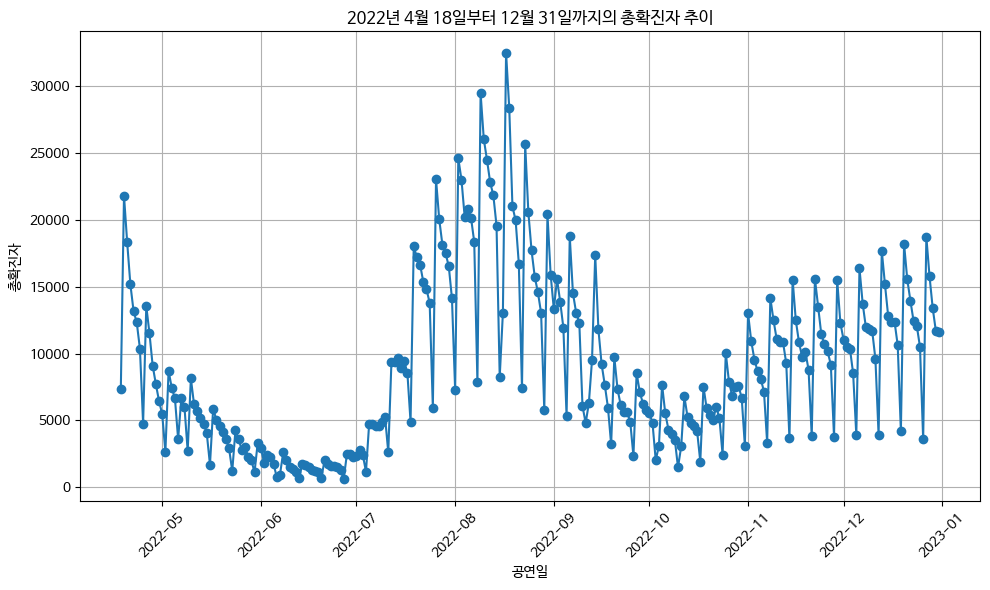

In [ ]:
covid['공연일'] = pd.to_datetime(covid['공연일'])

plt.figure(figsize=(10, 6))
plt.plot(covid['공연일'], covid['일일확진자'], marker='o', linestyle='-')
plt.title('2022년 4월 18일부터 12월 31일까지의 총확진자 추이')
plt.xlabel('공연일')
plt.ylabel('총확진자')
plt.grid(True)
plt.xticks(rotation=45)  # x축 레이블을 45도 회전하여 표시
plt.tight_layout()

# 그래프를 표시합니다.
plt.show()


In [ ]:
A = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_A.csv')
B = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_B.csv')
C = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_C.csv')

In [ ]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179165 entries, 0 to 1179164
Data columns (total 53 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   입장권고유번호   1179165 non-null  object 
 1   delta     1179165 non-null  int64  
 2   y         1179165 non-null  int64  
 3   group     1179165 non-null  object 
 4   성별        1179165 non-null  int64  
 5   단독판매여부    1179165 non-null  bool   
 6   예매금액      1179165 non-null  int64  
 7   교통개수      1179165 non-null  int64  
 8   팔로워합      1179165 non-null  float64
 9   수상실적개수    1179165 non-null  int64  
 10  좌석등급개수    1179165 non-null  int64  
 11  무대시설      1179165 non-null  int64  
 12  공연별전사코개수  1179165 non-null  int64  
 13  강수        1179165 non-null  float64
 14  기온        1179165 non-null  float64
 15  습도        1179165 non-null  float64
 16  공연시설인기    1179165 non-null  object 
 17  편의시설      1179165 non-null  int64  
 18  장애인시설     1179165 non-null  int64  
 19  주차시설      1179165 non

In [ ]:
print(A['할인종류코드'].unique())
print(B['할인종류코드'].unique())
print(C['할인종류코드'].unique())

[99.]
[99.  1.  4.]
[99.  1.  3.]


In [ ]:
print(A['할인종류개수'].unique())
print(B['할인종류개수'].unique())
print(C['할인종류개수'].unique())

[1 7 6 4 5 3 0 2 8 9]
[ 0  3  2  1  4  5  7  6  8 10  9 12 16 11 14 13 15]
[ 7  5  1  8 10  2  0  3  9 11  6  4 14 13 16 12 15 18 17]


In [ ]:
print(B['공연_오전오후'].unique())

['오전' '오후']


In [ ]:
print(A['세부장르명'].unique())
print(B['세부장르명'].unique())
print(C['세부장르명'].unique())

['뮤지컬' '넌버벌 퍼포먼스']
['뮤지컬']
['뮤지컬' '악극' '넌버벌 퍼포먼스']


In [ ]:
print(A['미세먼지등급'].unique())
print(B['미세먼지등급'].unique())
print(C['미세먼지등급'].unique())

[1. 0. 2.]
[1. 2. 0. 3.]
[1. 2. 3. 0.]


# COX_C

In [12]:
optc = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/회의록/결과 csv/C_optimal_org.csv')

In [13]:
optc_z = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/회의록/결과 csv/C_optimal_z.csv')

In [14]:
optc.columns = ['변수', '지수(exp)']
optc_z.columns = ['변수', '지수(exp)']

In [15]:
optc.head()

,변수,지수(exp)
0,단독판매여부,0.992446
1,예매금액,1.000002
2,교통개수,1.003498
3,팔로워합,1.000008
4,수상실적개수,1.000000


In [16]:
optc_z.to_csv('/content/drive/MyDrive/KOPIS DATA/회의록/결과 csv/C_optimal_z.csv',index=False)

In [17]:
optc.to_csv('/content/drive/MyDrive/KOPIS DATA/회의록/결과 csv/C_optimal_org.csv',index=False)

In [21]:
optc

,변수,지수(exp)
0,단독판매여부,0.992446
1,예매금액,1.000002
2,교통개수,1.003498
3,팔로워합,1.000008
4,수상실적개수,1.000000
...,...,...
69,결제수단코드_99,0.877553
70,예매방식코드_2,1.230808
71,예매방식코드_3,4.836992
72,예매방식코드_99,1.009263
